#Task 2 - Data Insights (Part 2)
##📑 Objective :

Recommend which of these 1000 new customers should be targeted to drive the most value for the organisation using the existing 3 datasets (Customer demographic, customer address and transactions)

## Load Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Specify the path to your Excel file
excel_file = "/content/KPMG_VI_New_raw_data_update_final (1).xlsx"

# Read the Excel file into a dictionary of data frames, where each key represents a sheet name
dfs = pd.read_excel(excel_file, sheet_name=None)

# Access each data frame by sheet name
for sheet_name, df in dfs.items():
    print(f"Sheet Name: {sheet_name}")
    #print(df)  # Do whatever operations you need with the data frame
    #print("-----------")
    if sheet_name == "NewCustomerList":
      data_newcust = df

Sheet Name: Title Sheet
Sheet Name: Transactions
Sheet Name: NewCustomerList
Sheet Name: CustomerDemographic
Sheet Name: CustomerAddress


In [ ]:
data_newcust.sample(3)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
870,Donica,Humby,Female,47,1967-06-01,Senior Cost Accountant,Financial Services,Mass Customer,N,No,...,NSW,Australia,12,0.77,0.770,0.9625,0.818125,871,871,0.541875
682,Sibby,Skinner,Female,25,1981-05-05,Accountant IV,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,7,0.56,0.700,0.7000,0.595000,682,682,0.700000
317,Cecelia,Cisar,Female,20,1985-03-26,NaN,Property,Mass Customer,N,Yes,...,QLD,Australia,7,0.70,0.875,0.8750,0.743750,312,312,1.020000


In [ ]:
data_newcust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

from the summury result dataset has missing valuea and column has unknown or irrelevant column. 
## Overview Dataset

In [ ]:
# Check unique value from each column
for col in data_newcust.columns:
    print("{} have {} unique values: {}".format(col, data_newcust[col].nunique(), data_newcust[col].dtypes))
    if data_newcust[col].dtypes == 'int64' or data_newcust[col].dtypes == 'float' or data_newcust[col].dtypes == 'object':
        print("{} values: {}".format(col, data_newcust[col].unique()))
        print('----------------------------------------------------------------------')

first_name have 940 unique values: object
first_name values: ['Chickie' 'Morly' 'Ardelis' 'Lucine' 'Melinda' 'Druci' 'Rutledge'
 'Nancie' 'Duff' 'Barthel' 'Rockwell' 'Wheeler' 'Olag' 'Melba' 'Mandie'
 'Dukie' 'Marcelia' 'Winnifred' 'Odilia' 'Karly' 'Teddie' 'Gaston' 'Otis'
 'Tabbatha' 'Brena' 'Rourke' 'Dyane' 'Claudine' 'Blinnie' 'Rhona'
 'Sharron' 'Brien' 'Sybilla' 'Mikel' 'Maisie' 'Arleen' 'Farlie' 'Mitchell'
 'Garik' 'Antonin' 'Vinny' 'Colene' 'Neile' 'Corinna' 'Brooke' 'Gipsy'
 'Sheena' 'Jobina' 'Gale' 'Thaxter' 'Heinrick' 'Taylor' 'Griswold'
 'Odessa' 'Lavena' 'Martelle' 'Briant' 'Marylou' 'Whittaker' 'Normy'
 'Lorrie' 'Jedediah' 'Kaine' 'Loise' 'Cristen' 'Dorothy' 'Rosmunda'
 'Rozamond' 'Gunner' 'Vivienne' 'Sherilyn' 'Bessie' 'Kevina' 'Yancy'
 'Mabelle' 'Hasheem' 'Tobias' 'Glennis' 'Chanda' 'Katheryn' 'Sumner'
 'Valerie' 'Esther' 'Gardie' 'Sean' 'Pietra' 'Marysa' 'Kahaleel' 'Ossie'
 'Sid' 'Ludovico' 'Patricia' 'Andromache' 'Levy' 'Nobe' 'Jehu' 'Symon'
 'Karlik' 'Bengt' 'Evangelin

From observing this summary data, we decided to perform data cleaning first. Our data-cleaning strategies include:

1. We will drop columns that have irrelevant values, namely Unnamed: 16, Unnamed: 17, Unnamed: 18, Unnamed: 19, Unnamed: 20
2. Next, we will fill the last_name column with the first_name value.
3. Then we will delete the remaining records that have missing values.
4. Last, convert the DOB column into age_class.

## Cleaning Dataset

In [ ]:
# copy dataset for backup
data_newcust1 = data_newcust.copy()

### **1. Dropping Columns**

In [ ]:
data_newcust1.drop(columns = ['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], inplace=True)

In [ ]:
data_newcust1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

### **2. Filling Column last name:**

In [ ]:
# filling nan in last name with first name
data_newcust1['last_name'].fillna(data_newcust1['first_name'], inplace=True)

In [ ]:
data_newcust1[['first_name', 'last_name']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   first_name  1000 non-null   object
 1   last_name   1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


### **3. Delete Missing Values**

In [ ]:
# checking missing values
data_newcust1.isna().sum()

first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [ ]:
data_newcust1.dropna(inplace=True)

In [ ]:
data_newcust1.isna().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
dtype: int64

### **4. Converting DOB into Age Class**

In [ ]:
# function calculate age
from datetime import date

def calculate_age(birthdate):
  today = date.today()
  age = today.year-birthdate.year-((today.month, today.day) < (birthdate.month, birthdate.day))
  return age

In [ ]:
data_newcust1['age'] = data_newcust1['DOB'].apply(calculate_age)
data_newcust1['age_class'] = (round(data_newcust1['age']/ 10) * 10).astype(int)
data_newcust1.drop(columns=['age'], inplace=True)

data_newcust1['age_class'].head()

0    60
1    50
2    50
3    40
4    60
Name: age_class, dtype: int64

In [ ]:
data_newcust1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           735 non-null    object        
 1   last_name                            735 non-null    object        
 2   gender                               735 non-null    object        
 3   past_3_years_bike_related_purchases  735 non-null    int64         
 4   DOB                                  735 non-null    datetime64[ns]
 5   job_title                            735 non-null    object        
 6   job_industry_category                735 non-null    object        
 7   wealth_segment                       735 non-null    object        
 8   deceased_indicator                   735 non-null    object        
 9   owns_car                             735 non-null    object        
 10  tenure        

## Filtering Dataset

In the previous analysis, there are several criteria for customers who are valuable and have the potential to generate profits for the company, such as :

* Aged in age_class 40 - 50.
* Work in manufacture, financial services, or health industry.
* Classified as mass customer.
* Live in New South Wales.
* Have property valuation at 7-10 range.

So we will do filtering based on these conditions.

In [ ]:
customer_new = data_newcust1.copy()

In [ ]:
customer_new.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age_class
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,60
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,50
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,50
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,40
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,60


In [ ]:
# filtering
# age class in 40 to 50.
# jod category - manufacturing ,financial service, health.
# wealth segment set mass customer on NSW state.
# Property valuation range in 7 - 10.
customer_new = customer_new.query('age_class in (40, 50) or job_industry_category in ("Manufacturing", "Financial Services", "Health") or wealth_segment == "Mass Customers" and state == "NSW" or (property_valuation >=7 and property_valuation <= 10)')

In [ ]:
customer_new.reset_index(inplace=True)

In [ ]:
customer_new = customer_new.sort_values(by='Rank')

In [ ]:
customer_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 667
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   index                                668 non-null    int64         
 1   first_name                           668 non-null    object        
 2   last_name                            668 non-null    object        
 3   gender                               668 non-null    object        
 4   past_3_years_bike_related_purchases  668 non-null    int64         
 5   DOB                                  668 non-null    datetime64[ns]
 6   job_title                            668 non-null    object        
 7   job_industry_category                668 non-null    object        
 8   wealth_segment                       668 non-null    object        
 9   deceased_indicator                   668 non-null    object        
 10  owns_car      

Out of 100 customer data we get 668 of them who have the most valuable to the company.

In [ ]:
# saving dataset
#customer_new.to_csv('NewCustomerList_Targeted.csv', index=False)

## EDA - Explotory Data Analysis

### **Age Distribution**

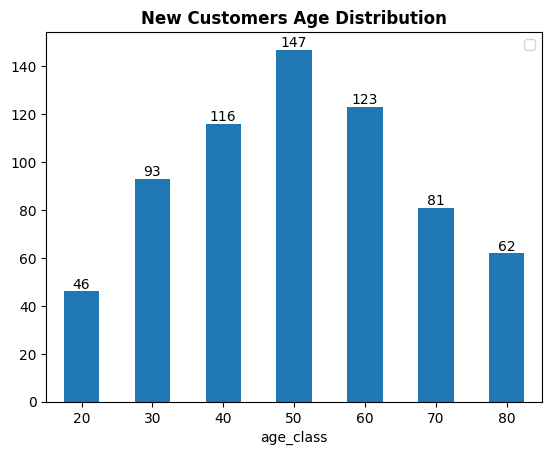

In [ ]:
# calculating data
group = customer_new.groupby(['age_class'])['age_class'].count()
group = group.reset_index(name='count')

# creating visualization
x = group.plot(kind='bar', x='age_class', y='count')
plt.title('New Customers Age Distribution', fontweight='bold')
plt.xticks(rotation=360)
plt.legend('')

# showing label in bars
for bar in x.patches:
    x.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

### **Job Industry Distribution**

Text(0.5, 1.0, 'New Customer Job Industry Distributions')

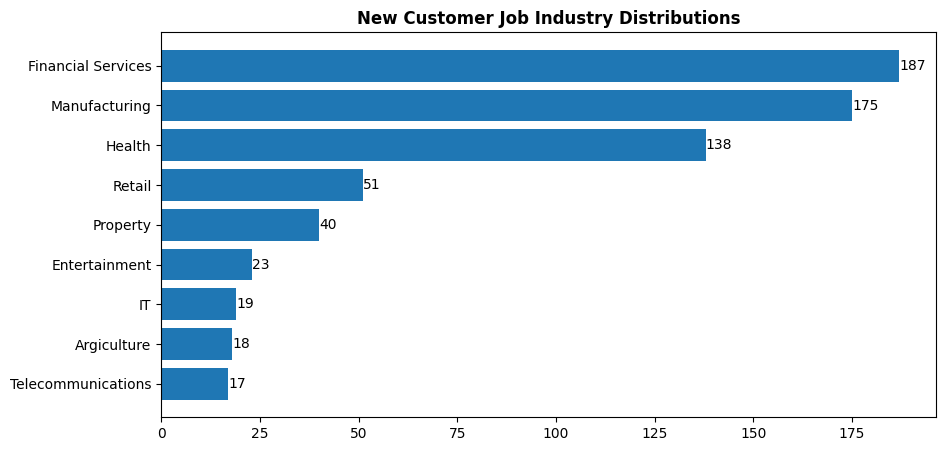

In [ ]:
# calculating data
indust = customer_new['job_industry_category'].value_counts().reset_index()
indust.columns = ['job_industry', 'count']

# visualizing job industry
fig, ax = plt.subplots(figsize=(10,5))

indust_sort = indust.sort_values(by=['count']).reset_index(drop=True)
bars = plt.barh(y=indust_sort['job_industry'], width= indust_sort['count'])
plt.bar_label(ax.containers[0]) 
plt.title('New Customer Job Industry Distributions', fontweight='bold')

### **Wealth Segment Distribution**

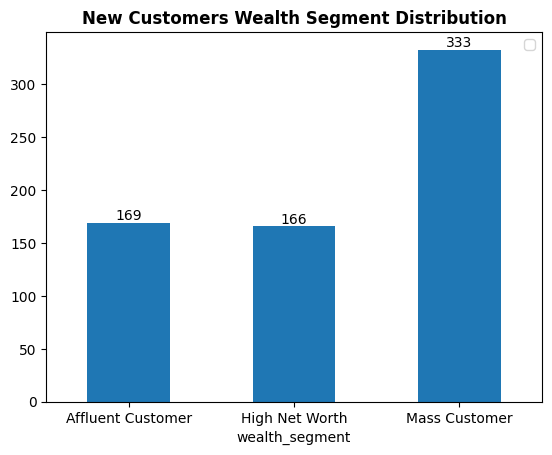

In [ ]:
# calculating data
group = customer_new.groupby(['wealth_segment'])['wealth_segment'].count()
group = group.reset_index(name='count')

# creating visualization
x = group.plot(kind='bar', x='wealth_segment', y='count')
plt.title('New Customers Wealth Segment Distribution', fontweight='bold')
plt.xticks(rotation=360)
plt.legend('')

# showing label in bars
for bar in x.patches:
    x.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

### **State Distribution**

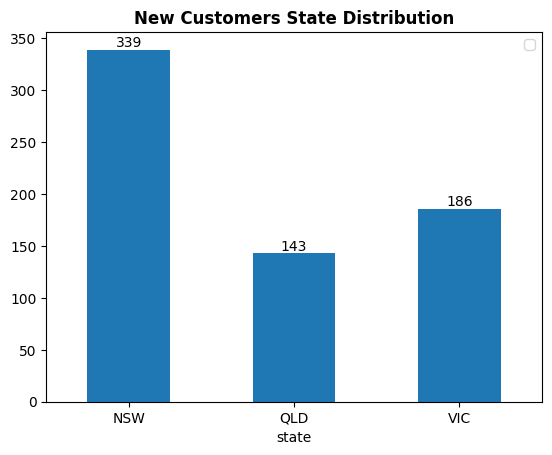

In [ ]:
# calculating data
group = customer_new.groupby(['state'])['state'].count()
group = group.reset_index(name='count')

# creating visualization
x = group.plot(kind='bar', x='state', y='count')
plt.title('New Customers State Distribution', fontweight='bold')
plt.xticks(rotation=360)
plt.legend('')

# showing label in bars
for bar in x.patches:
    x.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

### **Property Valuation Distribution**

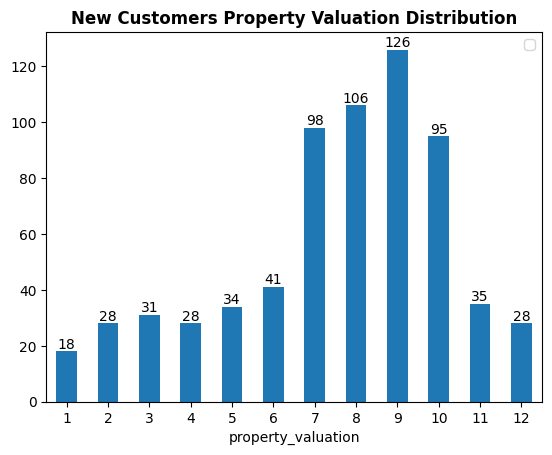

In [ ]:
# calculating data
group = customer_new.groupby(['property_valuation'])['property_valuation'].count()
group = group.reset_index(name='count')

# creating visualization
x = group.plot(kind='bar', x='property_valuation', y='count')
plt.title('New Customers Property Valuation Distribution', fontweight='bold')
plt.xticks(rotation=360)
plt.legend('')

# showing label in bars
for bar in x.patches:
    x.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')